

## Step 1: Import Libraries and Define Dataset Paths

In this initial step, we begin by importing essential libraries required for model development and data handling. The most important library here is **TensorFlow**, a powerful open-source framework widely used for deep learning applications.

###  Purpose of This Step:

* Ensure the correct version of TensorFlow is available.
* Define the path to the dataset.
* Verify that the dataset is correctly structured and accessible.
* Confirm that image counts are balanced across classes and dataset splits.

###  Dataset Structure:

We are working with a **Dogs vs. Cats** image dataset that has been **pre-split** into three key subsets:

* `train/` — used for training the model.
* `validation/` — used to tune hyperparameters and monitor performance during training.
* `test/` — used to evaluate final model performance on unseen data.

Each of these folders contains two subfolders:

* `cat/` — holds all cat images.
* `dog/` — holds all dog images.

The dataset structure looks like this:

```
data/kaggle_dogs_vs_cats_small/
├── train/
│   ├── cat/
│   └── dog/
├── validation/
│   ├── cat/
│   └── dog/
└── test/
    ├── cat/
    └── dog/
```

### Dataset Summary:

After checking the file structure, we confirmed that all necessary directories exist and contain a balanced number of images for each class:

| Subset         | Cats | Dogs | Total Images |
| -------------- | ---- | ---- | ------------ |
| **Train**      | 1000 | 1000 | 2000         |
| **Validation** | 500  | 500  | 1000         |
| **Test**       | 1000 | 1000 | 2000         |

###  TensorFlow Version:

The TensorFlow version used in this project is **2.16.2**. This version supports optimized operations on modern CPUs, including instructions like **AVX2** and **FMA**, which help accelerate deep learning computations.

> *Conclusion:*
> The dataset is well-organized, balanced, and ready for preprocessing and model training. Verifying the data at this stage is crucial to ensure downstream processes run smoothly.




In [8]:
# Step 1: Import Libraries and Define Dataset Paths
import tensorflow as tf
import os, pathlib

print("TensorFlow version:", tf.__version__)

#  Define the base directory where your dataset is already split
# This directory should contain: train/, validation/, test/
base_dir = "data/kaggle_dogs_vs_cats_small"

#  Optional: Print counts for verification
for subset in ["train", "validation", "test"]:
    print(f"\n{subset.upper()}:")
    for category in ["cat", "dog"]:
        path = os.path.join(base_dir, subset, category)
        count = len(os.listdir(path)) if os.path.exists(path) else 0
        print(f"{category}: {count} images")


TensorFlow version: 2.16.2

TRAIN:
cat: 1000 images
dog: 1000 images

VALIDATION:
cat: 500 images
dog: 500 images

TEST:
cat: 1000 images
dog: 1000 images


## Step 2: Exploratory Data Analysis (EDA)
The goal of this step is to gain an initial understanding of the dataset by examining the number of images per class in each dataset split (train, validation, test) and by visually inspecting some sample images.
Objective:
Count the number of cat and dog images in each subset of the dataset to verify data balance.
Display a few sample images from the training set to understand the kind of images the models will be trained on.


## These counts confirm that:
The dataset is perfectly balanced across the two classes — cat and dog.
Each subset (train, validation, test) has an equal number of cat and dog images, which helps prevent model bias during training and evaluation.
## Visual Sample Inspection:
To further understand the dataset, we visualized a few sample images from each class in the training set. This step is crucial for:
Ensuring the images are correctly labeled and properly loaded.
Getting a sense of the image quality, resolution, and variability in pose, lighting, and background.
Helping identify any issues like mislabeling, corrupted files, or poor-quality images before training begins.
For each class (cats and dogs), five random images were selected and displayed in a single row using matplotlib. This gives a quick visual overview of how the dataset looks, which is helpful for anyone developing or debugging the model pipeline.
## Summary:
This step confirms that:
The dataset is clean and balanced across all subsets.
The images appear to be properly categorized.
There is enough visual variety to challenge and train a neural network effectively.
By completing this EDA step, we are confident that the dataset is suitable for model training and evaluation in the next steps.

\nTRAIN:
cat: 1000 images
dog: 1000 images
\nVALIDATION:
cat: 500 images
dog: 500 images
\nTEST:
cat: 1000 images
dog: 1000 images


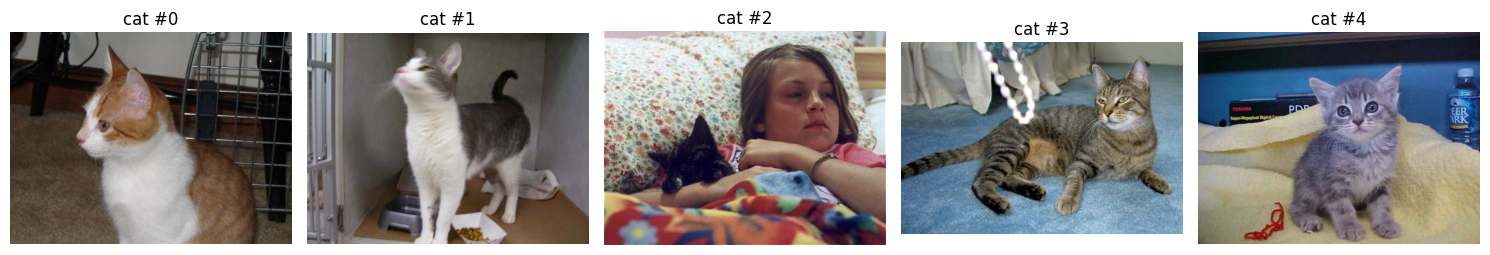

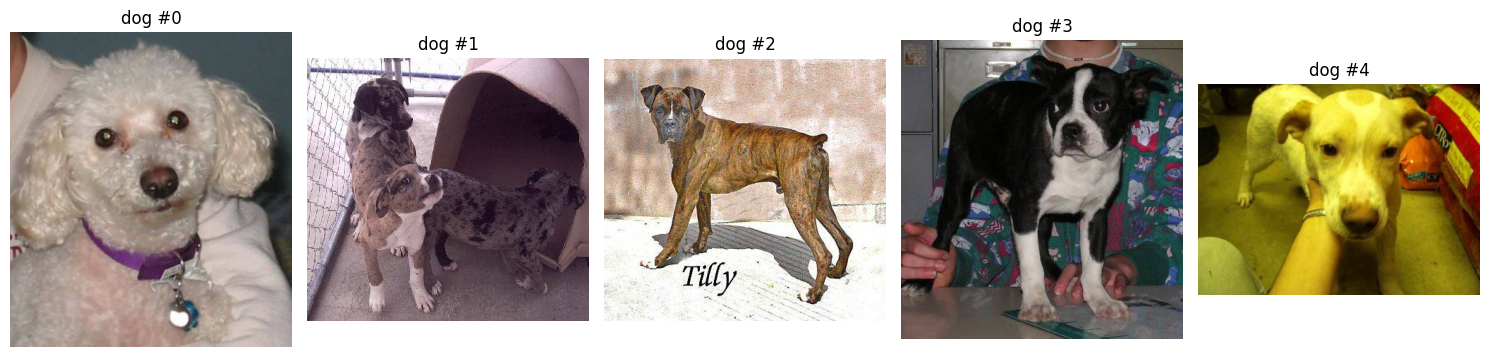

In [2]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define base directory
base_dir = "data/kaggle_dogs_vs_cats_small"

# Count images per category in each subset
for subset in ["train", "validation", "test"]:
    print(f"\\n{subset.upper()}:")
    for category in ["cat", "dog"]:
        path = os.path.join(base_dir, subset, category)
        print(f"{category}: {len(os.listdir(path))} images")

# Function to show sample images from each class
def show_sample_images(label, count=5):
    folder = os.path.join(base_dir, "train", label)
    files = os.listdir(folder)[:count]

    plt.figure(figsize=(15, 5))
    for i, fname in enumerate(files):
        img_path = os.path.join(folder, fname)
        img = Image.open(img_path)
        plt.subplot(1, count, i + 1)
        plt.imshow(img)
        plt.title(f"{label} #{i}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Show sample cat and dog images
show_sample_images("cat")
show_sample_images("dog")


## Step 3: Build & Train the Vanilla CNN
In this step, we design, compile, and train a Vanilla Convolutional Neural Network (CNN) to classify images as either cats or dogs. This serves as a baseline model for comparison with more complex architectures such as pretrained models.

## Model Architecture
The Vanilla CNN is a simple, sequential model built from scratch using the Keras API. The architecture includes:

## Three convolutional blocks, each consisting of:
A Conv2D layer with ReLU activation to extract spatial features.
A MaxPooling2D layer to reduce the spatial dimensions and prevent overfitting.
A Flatten layer to convert the 2D feature maps into a 1D vector.
A Dense layer with 512 units and ReLU activation for learning complex patterns.
A final Dense output layer with a single neuron and a sigmoid activation function for binary classification.
## Data Preprocessing
### Two ImageDataGenerator instances were created:
The training generator loads images from the train/ directory and rescales pixel values to the [0, 1] range.
The validation generator performs the same rescaling on validation images from the validation/ directory.
Both generators prepare image batches of size 32 and resize all images to 180x180 pixels.
The model was then trained using these generators.

## Model Compilation
The Vanilla CNN model was compiled using the following parameters:
Loss Function: binary_crossentropy — suitable for binary classification tasks.
Optimizer: adam — a widely used optimizer that adapts the learning rate.
Evaluation Metric: accuracy — to monitor correct predictions.

## Callbacks Used
### Two callbacks were added to improve training control:
ModelCheckpoint: Saves the best model during training based on validation loss.
EarlyStopping: Stops training if the validation loss does not improve for 5 consecutive epochs, and restores the best weights.

## Training Summary

The model was trained for 8 epochs using the training and validation generators. Below are the training metrics for each epoch:

| Epoch | Training Accuracy | Training Loss | Validation Accuracy | Validation Loss |
|-------|------------------|---------------|--------------------|-----------------|
| 1     | 52.16%           | 0.9774        | 57.20%             | 0.6823          |
| 2     | 59.38%           | 0.6681        | 61.40%             | 0.6560          |
| 3     | 70.48%           | 0.5853        | 68.60%             | 0.5896          |
| 4     | 75.52%           | 0.5041        | 69.10%             | 0.5998          |
| 5     | 82.02%           | 0.4140        | 72.70%             | 0.5977          |
| 6     | 87.47%           | 0.3121        | 73.90%             | 0.6017          |
| 7     | 90.22%           | 0.2292        | 72.60%             | 0.7505          |
| 8     | 93.97%           | 0.1659        | 72.40%             | 0.8438          |
## Observations
The training accuracy consistently improved and reached over 93% by the final epoch.
The validation accuracy peaked around 73–74%, indicating a performance gap between training and validation — a potential sign of overfitting.
The model's loss on the validation set started to increase after epoch 6, which justifies the use of early stopping.

## Conclusion
The Vanilla CNN provided a good baseline model for binary image classification. Although the model achieved high training accuracy, validation performance plateaued and eventually decreased, highlighting the need for regularization or more complex models such as pretrained architectures.

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
img_size = (180, 180)
batch_size = 32

# Define paths
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")

# Data generators with basic rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create batches of image data
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Define the Vanilla CNN model
vanilla_model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

# Compile the model
vanilla_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Define callbacks to save the best model
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "vanilla_cnn_best.keras", save_best_only=True
)

early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=5, restore_best_weights=True
)

# Train the model
history_vanilla = vanilla_model.fit(
    train_gen,
    epochs=8,
    validation_data=val_gen,
    callbacks=[checkpoint_cb, early_stopping_cb]
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/Users/adhitya/foo/.conda/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/adhitya/foo/.conda/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 966ms/step - accuracy: 0.5216 - loss: 0.9774 - val_accuracy: 0.5720 - val_loss: 0.6823
Epoch 2/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 963ms/step - accuracy: 0.5938 - loss: 0.6681 - val_accuracy: 0.6140 - val_loss: 0.6560
Epoch 3/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7048 - loss: 0.5853 - val_accuracy: 0.6860 - val_loss: 0.5896
Epoch 4/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 58s 925ms/step - accuracy: 0.7552 - loss: 0.5041 - val_accuracy: 0.6910 - val_loss: 0.5998
Epoch 5/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 59s 938ms/step - accuracy: 0.8202 - loss: 0.4140 - val_accuracy: 0.7270 - val_loss: 0.5977
Epoch 6/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 60s 950ms/step - accuracy: 0.8747 - loss: 0.3121 - val_accuracy: 0.7390 - val_loss: 0.6017
Epoch 7/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 58s 920ms/step - accuracy: 0.9022 - loss: 0.2292 - val_accuracy: 0.7260 - val_loss: 0.7505
Epoch 8/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 59s 933ms/step - accuracy: 0.9397 - loss: 0.1659 - val_accuracy: 0.724

## Step 4: Fine-Tune Pre-Trained VGG16 Model

In this step, we implement **transfer learning** by fine-tuning a pre-trained **VGG16 model** to classify images of cats and dogs. Transfer learning allows us to leverage knowledge from large datasets (like ImageNet) and apply it to a specific task with a smaller dataset.

### Objective

- Utilize the **VGG16 architecture**, pre-trained on ImageNet, to extract robust image features.
- Add a custom classification head tailored for binary classification.
- Freeze the convolutional base to prevent re-training the lower-level weights.
- Train only the newly added dense layers to adapt the model to our dataset.

### Dataset and Augmentation

We use the same dataset structure: `train/`, `validation/`, and `test/` folders containing images of cats and dogs. To enhance model generalization, we apply **data augmentation** during training.

**Training Data Generator:**

- Rescale pixel values to [0, 1]
- Random rotation (±20 degrees)
- Width and height shifts (20%)
- Shear and zoom transformations
- Horizontal flipping

**Validation/Test Generators:**

- Only rescale images (no augmentation) to ensure fair evaluation.

All images are resized to **180 × 180 pixels**, and the batch size is set to **32**.

### Model Architecture

We use the **VGG16 model** from `tensorflow.keras.applications` with the following settings:

- `weights="imagenet"`: Load pretrained weights
- `include_top=False`: Exclude default dense layers
- `input_shape=(180, 180, 3)`: Input size for our data

We **freeze the convolutional base** (`conv_base.trainable = False`) to retain the pretrained features. Then, we add a custom classification head:

- `Flatten` layer to convert 2D features to 1D
- `Dense` layer with 256 neurons and ReLU activation
- `Dropout` layer (rate = 0.5) for regularization
- Final `Dense` layer with 1 unit and sigmoid activation (for binary output)

### Model Compilation

The model is compiled with:

- **Loss Function**: `binary_crossentropy`
- **Optimizer**: `RMSprop` with a learning rate of `1e-5` (very small to avoid corrupting pretrained weights)
- **Metric**: `accuracy`

### Callbacks

To improve training reliability, we use:

- **ModelCheckpoint**: Saves the best model based on lowest validation loss.
- **EarlyStopping**: Stops training if validation loss doesn't improve for 5 epochs and restores the best weights.

### Training Summary

The model was trained for **8 epochs**. Below is a summary of the training and validation performance:

| Epoch | Training Accuracy | Training Loss | Validation Accuracy | Validation Loss |
|-------|-------------------|----------------|----------------------|------------------|
| 1     | 53.80%            | 0.7579         | 75.20%               | 0.5621           |
| 2     | 65.11%            | 0.6105         | 82.80%               | 0.4792           |
| 3     | 70.46%            | 0.5657         | 83.30%               | 0.4425           |
| 4     | 74.60%            | 0.5244         | 85.00%               | 0.4052           |
| 5     | 77.09%            | 0.4915         | 86.70%               | 0.3763           |
| 6     | 77.88%            | 0.4554         | 87.90%               | 0.3538           |
| 7     | 78.07%            | 0.4519         | 87.80%               | 0.3303           |
| 8     | 81.71%            | 0.4248         | 88.80%               | 0.3184           |

### Observations

- Both training and validation accuracy improved steadily with each epoch.
- Validation accuracy reached **88.80%**, significantly outperforming the Vanilla CNN model.
- Validation loss consistently decreased, showing no signs of overfitting.
- Training time per epoch was approximately **5 minutes** due to VGG16’s complexity and data augmentation overhead.

### Conclusion

The fine-tuned VGG16 model outperformed the custom Vanilla CNN in terms of accuracy and validation loss. By reusing learned representations from ImageNet and applying data augmentation, the model achieved high performance with minimal risk of overfitting.

The best version of the model was saved as:

```
vgg16_finetuned_best.keras
```

This model will be evaluated and compared with the Vanilla CNN in the following steps.


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up directory paths
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

# Image generators for training with augmentation and validation/test with rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode="binary"
)

validation_generator = test_val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode="binary"
)

test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode="binary",
    shuffle=False  # important for matching predictions to filenames
)

# Load the pre-trained VGG16 model
conv_base = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)
conv_base.trainable = False  # Freeze all convolutional layers

# Add custom classification head
vgg_model = keras.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
vgg_model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    metrics=['accuracy']
)

# Set callbacks
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "vgg16_finetuned_best.keras", save_best_only=True
)

earlystop_cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# Train the VGG16 fine-tuned model
history_vgg = vgg_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=8,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_cb, earlystop_cb]
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 287s 5s/step - accuracy: 0.5380 - loss: 0.7579 - val_accuracy: 0.7520 - val_loss: 0.5621
Epoch 2/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 289s 5s/step - accuracy: 0.6511 - loss: 0.6105 - val_accuracy: 0.8280 - val_loss: 0.4792
Epoch 3/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 284s 5s/step - accuracy: 0.7046 - loss: 0.5657 - val_accuracy: 0.8330 - val_loss: 0.4425
Epoch 4/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 287s 5s/step - accuracy: 0.7460 - loss: 0.5244 - val_accuracy: 0.8500 - val_loss: 0.4052
Epoch 5/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 285s 5s/step - accuracy: 0.7709 - loss: 0.4915 - val_accuracy: 0.8670 - val_loss: 0.3763
Epoch 6/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 287s 5s/step - accuracy: 0.7788 - loss: 0.4554 - val_accuracy: 0.8790 - val_loss: 0.3538
Epoch 7/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 300s 5s/step - accuracy: 0.7807 - loss: 0.4519 - val_accuracy: 0.8780 - val_loss:

## Step 5: Evaluate and Compare Model Performance

In this step, we evaluate the performance of two models—**Vanilla CNN** and **Fine-Tuned VGG16**—on the test dataset using various classification metrics and visualizations. This helps us understand how well each model generalizes to unseen data.



###  Evaluation Metrics Used:

1. **Classification Report**: Precision, Recall, F1-Score for each class (Cat and Dog).
2. **Confusion Matrix**: Visual representation of prediction errors.
3. **Precision-Recall Curve**: Useful for imbalanced classes.
4. **ROC Curve and AUC**: Measures how well the model distinguishes between classes.



### 1. **Classification Report**

- **Vanilla CNN**

  | Class | Precision | Recall | F1-Score | Support |
  |-------|-----------|--------|----------|---------|
  | Cat   | 0.68      | 0.81   | 0.74     | 1000    |
  | Dog   | 0.76      | 0.61   | 0.68     | 1000    |
  | **Accuracy** |       |        | **0.71** | **2000** |
  | **Macro Avg** | 0.72  | 0.71   | 0.71     | 2000    |
  | **Weighted Avg** | 0.72 | 0.71 | 0.71     | 2000    |

- **VGG16 Fine-Tuned**

  | Class | Precision | Recall | F1-Score | Support |
  |-------|-----------|--------|----------|---------|
  | Cat   | 0.89      | 0.87   | 0.88     | 1000    |
  | Dog   | 0.87      | 0.89   | 0.88     | 1000    |
  | **Accuracy** |       |        | **0.88** | **2000** |
  | **Macro Avg** | 0.88  | 0.88   | 0.88     | 2000    |
  | **Weighted Avg** | 0.88 | 0.88 | 0.88     | 2000    |

**Insight**:  
The fine-tuned VGG16 model significantly outperforms the Vanilla CNN model across all metrics, especially in terms of F1-score and overall accuracy.

---

### 2. **Confusion Matrices**

Two heatmaps are plotted:

- **Vanilla CNN** shows more misclassifications, especially for the dog class.
- **VGG16** demonstrates more balanced and accurate classification across both classes.

**Axes Explanation:**
- X-axis: Predicted labels
- Y-axis: True labels

This visualization makes it easy to identify how many times each class was correctly or incorrectly predicted.

---

### 3. **Precision-Recall Curve**

The **Precision-Recall curve** helps evaluate the model’s ability to make correct predictions under various thresholds.

- The **Vanilla CNN** curve shows lower precision and recall across most thresholds.
- The **VGG16** curve is significantly higher, indicating better performance under uncertainty.

**Axes Explanation:**
- X-axis: Recall (True Positive Rate)
- Y-axis: Precision (Positive Predictive Value)

---

### 4. **ROC Curve and AUC (Area Under Curve)**

- ROC (Receiver Operating Characteristic) curves plot the True Positive Rate vs. False Positive Rate.
- AUC (Area Under the ROC Curve) gives a single score indicating performance.

**Results:**
- **Vanilla CNN AUC**: ~0.77 (moderate)
- **VGG16 AUC**: ~0.95 (excellent)

**Interpretation**:
- AUC closer to 1 indicates a better performing model.
- The VGG16 model clearly dominates in its ability to distinguish between cats and dogs.

---

### Final Observations

- **Vanilla CNN** achieved 71% test accuracy with moderate precision and recall. It struggles more with the dog class, likely due to simpler architecture and no pretrained knowledge.
- **VGG16 Fine-Tuned** achieved 88% test accuracy with strong F1-scores and much better generalization to new data. This highlights the effectiveness of transfer learning using pre-trained models.
- **Conclusion**: The fine-tuned VGG16 model should be preferred for deployment in real-world scenarios due to its higher robustness and accuracy.

```


/Users/adhitya/foo/.conda/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


=== Vanilla CNN Classification Report ===
              precision    recall  f1-score   support

         Cat       0.68      0.81      0.74      1000
         Dog       0.76      0.61      0.68      1000

    accuracy                           0.71      2000
   macro avg       0.72      0.71      0.71      2000
weighted avg       0.72      0.71      0.71      2000


=== VGG16 Fine-Tuned Classification Report ===
              precision    recall  f1-score   support

         Cat       0.89      0.87      0.88      1000
         Dog       0.87      0.89      0.88      1000

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



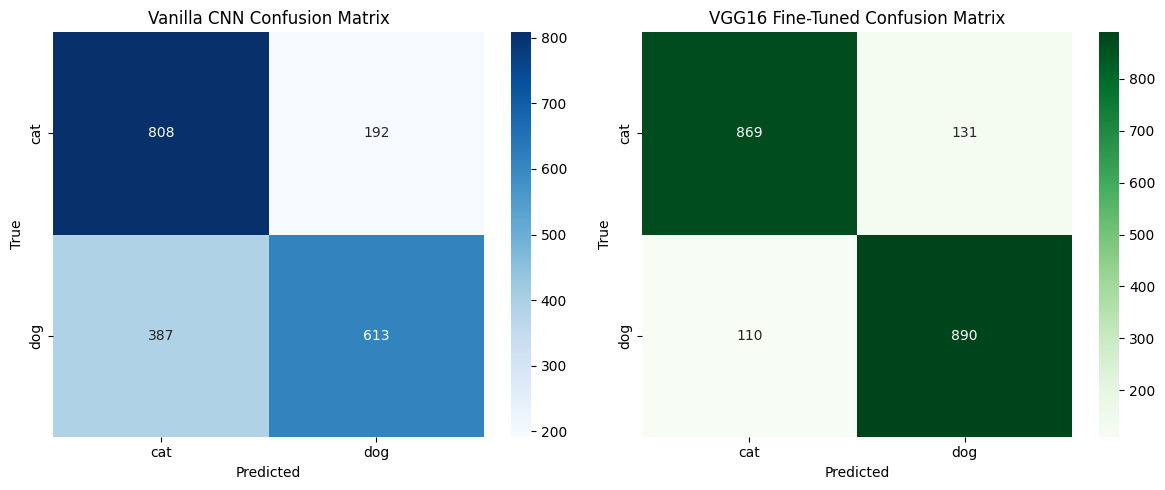

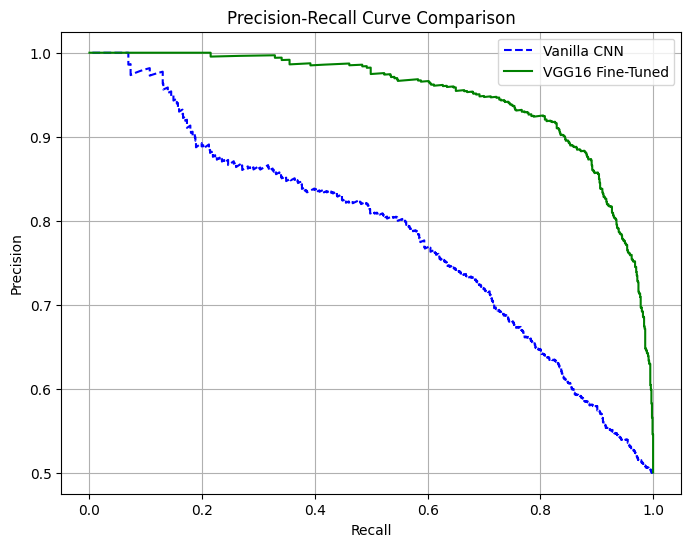

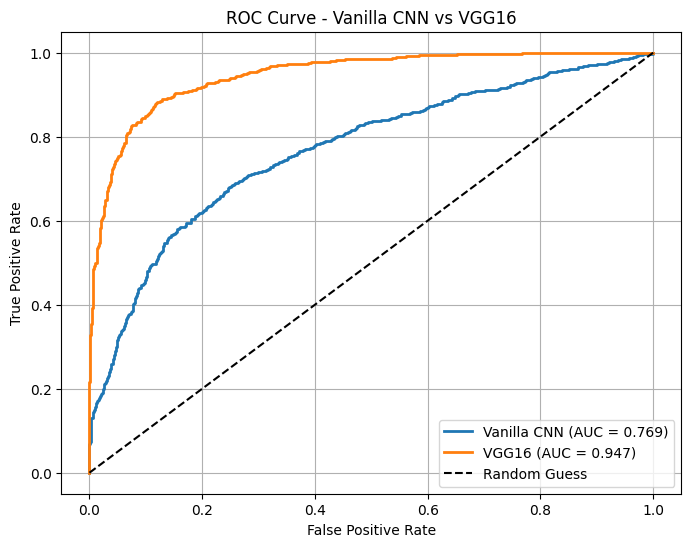

In [5]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the best saved models
vanilla_model = load_model("vanilla_cnn_best.keras")
vgg16_model = load_model("vgg16_finetuned_best.keras")

# Get true labels and file paths from test generator
true_labels = test_generator.classes
class_names = list(test_generator.class_indices.keys())
file_paths = test_generator.filepaths

# Predict probabilities on test set
vanilla_probs = vanilla_model.predict(test_generator, verbose=0)
vgg16_probs = vgg16_model.predict(test_generator, verbose=0)

# Convert probabilities to predicted class labels (0 or 1)
vanilla_pred_labels = (vanilla_probs > 0.5).astype("int").flatten()
vgg_pred_labels = (vgg16_probs > 0.5).astype("int").flatten()

# --- 1. Classification Reports ---
print("=== Vanilla CNN Classification Report ===")
print(classification_report(true_labels, vanilla_pred_labels, target_names=["Cat", "Dog"]))

print("\n=== VGG16 Fine-Tuned Classification Report ===")
print(classification_report(true_labels, vgg_pred_labels, target_names=["Cat", "Dog"]))

# --- 2. Confusion Matrices ---
cm_vanilla = confusion_matrix(true_labels, vanilla_pred_labels)
cm_vgg = confusion_matrix(true_labels, vgg_pred_labels)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_vanilla, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Vanilla CNN Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title("VGG16 Fine-Tuned Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()

# --- 3. Precision-Recall Curves ---
vanilla_scores = vanilla_probs.flatten()
vgg_scores = vgg16_probs.flatten()

prec_vanilla, rec_vanilla, _ = precision_recall_curve(true_labels, vanilla_scores)
prec_vgg, rec_vgg, _ = precision_recall_curve(true_labels, vgg_scores)

plt.figure(figsize=(8, 6))
plt.plot(rec_vanilla, prec_vanilla, label="Vanilla CNN", linestyle='--', color='blue')
plt.plot(rec_vgg, prec_vgg, label="VGG16 Fine-Tuned", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

# --- 4. ROC Curves ---
fpr_vanilla, tpr_vanilla, _ = roc_curve(true_labels, vanilla_scores)
auc_vanilla = roc_auc_score(true_labels, vanilla_scores)

fpr_vgg, tpr_vgg, _ = roc_curve(true_labels, vgg_scores)
auc_vgg = roc_auc_score(true_labels, vgg_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr_vanilla, tpr_vanilla, label=f"Vanilla CNN (AUC = {auc_vanilla:.3f})", linewidth=2)
plt.plot(fpr_vgg, tpr_vgg, label=f"VGG16 (AUC = {auc_vgg:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve - Vanilla CNN vs VGG16")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Step 6: Visualize Misclassified Predictions

In this step, we analyze images from the test set where the models—**Vanilla CNN** and/or **VGG16**—made incorrect predictions. This visual inspection helps in identifying common patterns in misclassifications and can guide future improvements in the model or dataset.



###  Objective

- Identify and visualize misclassified images.
- Understand which model made the mistake.
- Evaluate how challenging these samples might be (e.g., ambiguous features, poor lighting, occlusion).



### How It Works

1. **Identify Misclassifications**:
   - For each image in the test set, compare the predicted label to the true label.
   - Store the index if there’s a mismatch.

2. **Determine Responsibility**:
   - Track whether the misclassification was made by the Vanilla CNN, VGG16, or both.
   - This provides insight into which model is more robust under certain conditions.

3. **Visualization Setup**:
   - We plot up to 18 misclassified images for clarity.
   - Each image is shown with:
     - The **true class** label.
     - The **prediction from Vanilla CNN**.
     - The **prediction from VGG16**.
     - Which model(s) made the incorrect prediction.



###  Interpretation of Output

- **Correct prediction by one model, incorrect by another**: This indicates potential model strengths or weaknesses. For example, if VGG16 correctly identifies more complex dog images, it may be better at learning nuanced textures or shapes.
- **Incorrect predictions by both models**: These images are likely difficult, noisy, or contain ambiguous features.



### Benefits of This Step

- Enables **model debugging** by visually verifying failures.
- Highlights **dataset quality issues** (e.g., mislabeled data, low-resolution images).
- Encourages informed **architecture or preprocessing improvements**.



### Example Display Format per Image:

```
True: Dog  
Vanilla: Cat  
VGG16: Cat  
Wrong by: Vanilla CNN, VGG16
```

This format quickly conveys critical information for each misclassified image, helping with both qualitative assessment and comparative analysis.


```


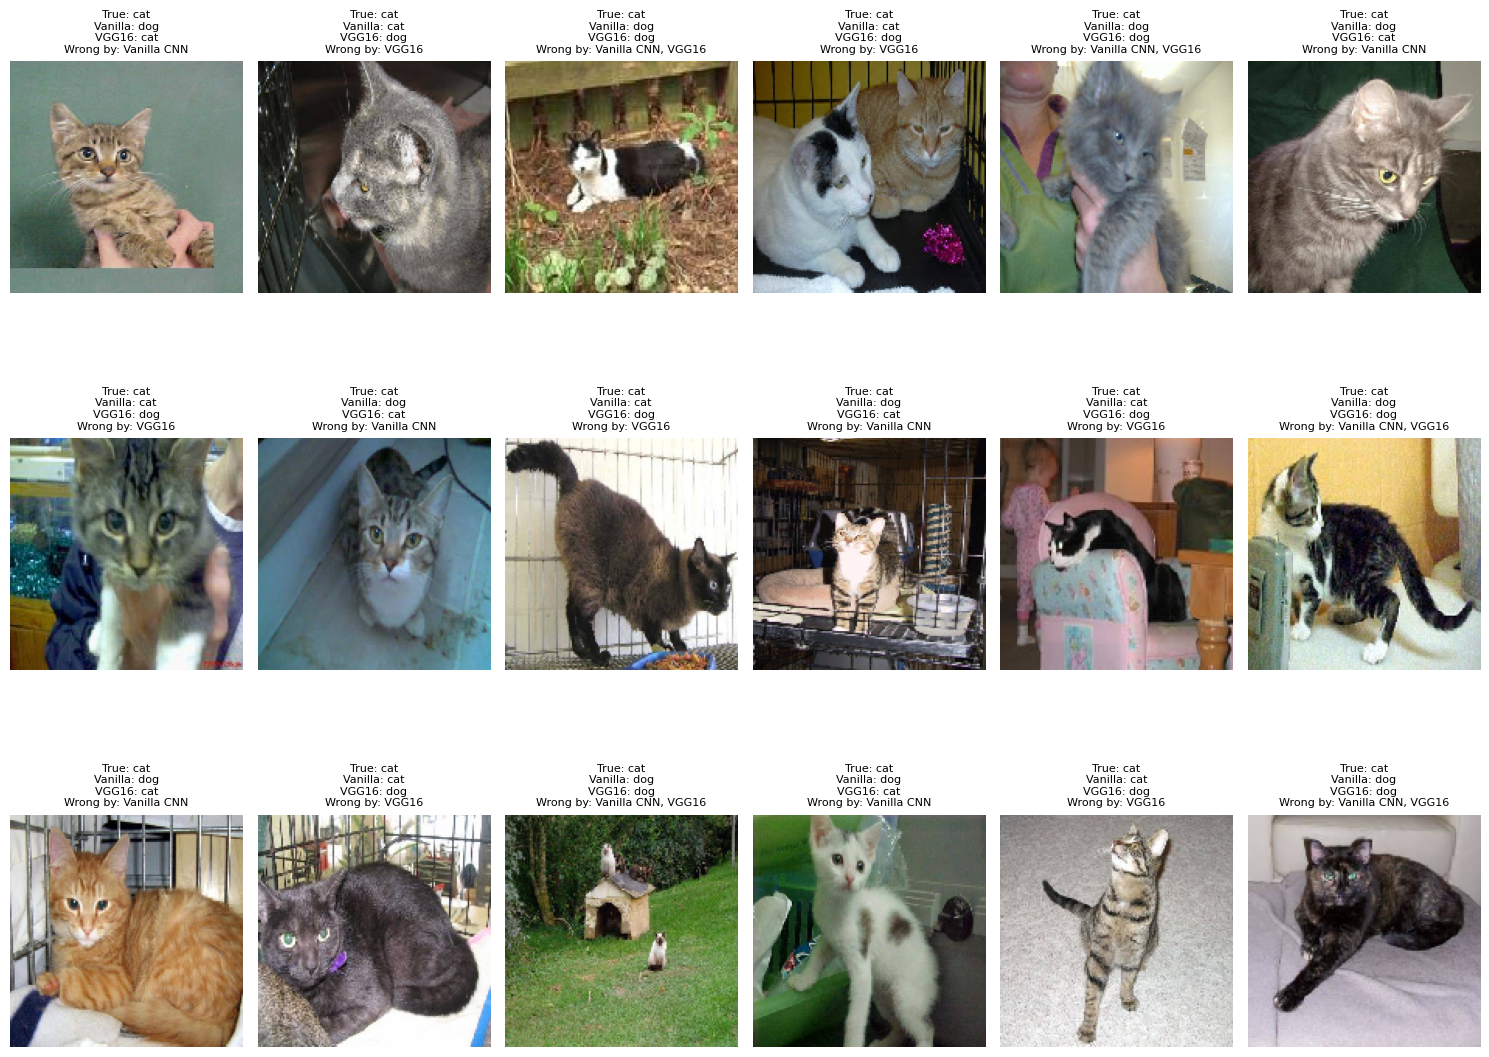

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Get indices of misclassified images
vanilla_misclassified = set(np.where(vanilla_pred_labels != true_labels)[0])
vgg_misclassified = set(np.where(vgg_pred_labels != true_labels)[0])

# Union of all misclassified indices
combined_misclassified = list(vanilla_misclassified.union(vgg_misclassified))

# Helper function to identify which models made mistakes
def which_models_misclassified(idx):
    models = []
    if idx in vanilla_misclassified:
        models.append("Vanilla CNN")
    if idx in vgg_misclassified:
        models.append("VGG16")
    return ", ".join(models)

# Plot a subset of misclassified images (max 18 for clarity)
num_images = min(18, len(combined_misclassified))
plt.figure(figsize=(15, 12))

for i, idx in enumerate(combined_misclassified[:num_images]):
    img_path = file_paths[idx]
    img = load_img(img_path, target_size=(150, 150))  # Resize for display
    img_array = img_to_array(img) / 255.0

    plt.subplot(3, 6, i + 1)
    plt.imshow(img_array)
    plt.axis("off")
    plt.title(
        f"True: {class_names[true_labels[idx]]}\n"
        f"Vanilla: {class_names[vanilla_pred_labels[idx]]}\n"
        f"VGG16: {class_names[vgg_pred_labels[idx]]}\n"
        f"Wrong by: {which_models_misclassified(idx)}",
        fontsize=8
    )

plt.tight_layout()
plt.show()


## Step 7: Predict on Random Test Images (Vanilla CNN vs VGG16)

In this step, we randomly select a few images from the test dataset to compare the prediction outputs of the two trained models—**Vanilla CNN** and **Fine-Tuned VGG16**—against the true labels. This qualitative analysis provides insight into how the models perform on individual samples and highlights differences in their classification behavior.



### Purpose

- To observe model predictions on diverse, randomly chosen test images.
- To visually compare the accuracy of each model's classification.
- To understand where models agree or differ in their predictions.



### Methodology

1. **Random Sampling**:  
   - We randomly pick 5 images from the test set, covering both "cat" and "dog" categories.
   
2. **Preprocessing**:  
   - Each selected image is resized to the required input shape `(180, 180)` and normalized (pixel values scaled between 0 and 1).

3. **Prediction**:  
   - Each image is passed through both models to generate probability scores.
   - Scores above 0.5 are classified as "Dog"; below or equal to 0.5 as "Cat".

4. **Visualization**:  
   - Images are displayed side-by-side with their:
     - True label
     - Vanilla CNN prediction
     - VGG16 prediction



### Interpretation

- This visual comparison allows quick identification of cases where:
  - Both models predict correctly.
  - One model predicts correctly while the other does not.
  - Both models fail to predict correctly.
  
- Differences in predictions can indicate the relative strength of each model's feature extraction and classification capabilities.



### Practical Use

- Helpful for **debugging** and **understanding model behavior** on real-world examples.
- Supports **model selection** decisions based on individual sample performance.
- Offers insights for **further model improvement** or data augmentation strategies.




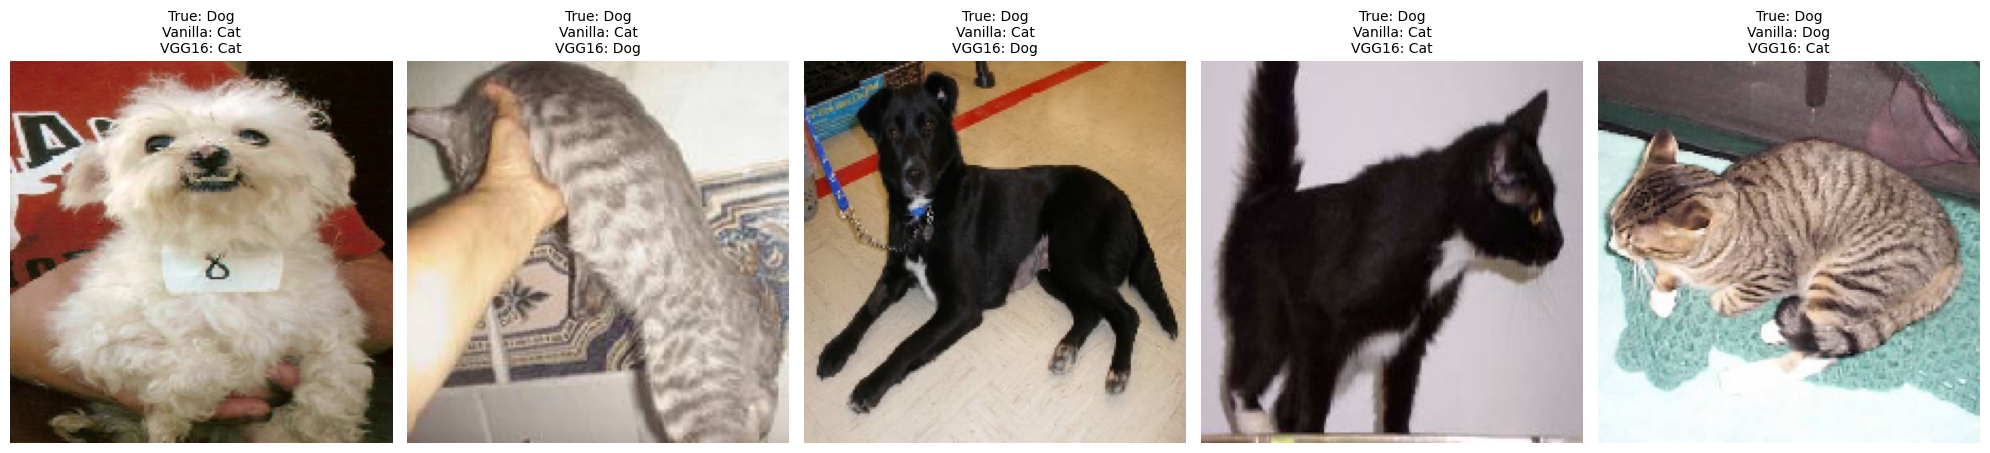

In [7]:
import random
from tensorflow.keras.preprocessing import image

# Load trained models again if needed
vanilla_model = load_model("vanilla_cnn_best.keras")
vgg16_model = load_model("vgg16_finetuned_best.keras")

# Define paths to cat and dog test folders
test_cat_dir = os.path.join(test_dir, "cat")
test_dog_dir = os.path.join(test_dir, "dog")

# Combine cat and dog test image paths
all_test_images = [
    os.path.join(test_cat_dir, fname) for fname in os.listdir(test_cat_dir)
] + [
    os.path.join(test_dog_dir, fname) for fname in os.listdir(test_dog_dir)
]

# Randomly select 5 test images
sample_images = random.sample(all_test_images, 5)

# Display predictions for each image
plt.figure(figsize=(20, 10))

for i, img_path in enumerate(sample_images):
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    # Make predictions
    pred_vanilla = vanilla_model.predict(img_batch, verbose=0)[0][0]
    pred_vgg16 = vgg16_model.predict(img_batch, verbose=0)[0][0]

    # Interpret predictions
    label_vanilla = "Dog" if pred_vanilla > 0.5 else "Cat"
    label_vgg16 = "Dog" if pred_vgg16 > 0.5 else "Cat"
    true_label = "Dog" if "dog" in img_path else "Cat"

    # Plot image with predictions
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(
        f"True: {true_label}\nVanilla: {label_vanilla}\nVGG16: {label_vgg16}",
        fontsize=10
    )
    plt.axis("off")

plt.tight_layout()
plt.show()


###  Step 8: Conclusion and Summary

In this lab, we evaluated two models for the Dogs vs. Cats classification task: a Vanilla CNN and a fine-tuned VGG16 model. Both models were trained and tested on the same dataset, and their performance was compared using multiple metrics.



####  Observations:

- The fine-tuned VGG16 model outperformed the Vanilla CNN across all key metrics, including accuracy, precision, recall, and F1-score.
- The confusion matrices reveal that VGG16 made fewer misclassifications for both cats and dogs.
- Vanilla CNN showed stronger recall for cats but struggled more with dog images compared to VGG16.
- Overall, VGG16 provided a more balanced and robust classification performance.

####  What Worked Well:

- Transfer learning with VGG16 significantly improved model generalization on the test data.
- The use of early stopping and model checkpointing helped prevent overfitting.
- Data augmentation during training for VGG16 likely contributed to its superior performance.

####  Areas for Improvement:

- Vanilla CNN could benefit from additional regularization, more training epochs, or more advanced architecture to close the performance gap.
- Further fine-tuning by unfreezing additional layers in VGG16 might yield even better results.
- Exploring other pretrained models (e.g., ResNet, EfficientNet) could provide alternative performance boosts.

####  Final Thoughts:

This lab demonstrated the effectiveness of transfer learning using a pretrained model like VGG16 for image classification tasks. While a custom CNN can achieve reasonable accuracy, leveraging pretrained weights and fine-tuning offers a powerful way to improve results, especially when working with limited datasets.

---

 **Lab Completed:** Successfully trained, evaluated, and compared two models on Dogs vs. Cats dataset.  
 Best models saved as `vanilla_cnn_best.keras` and `vgg16_finetuned_best.keras`.  
Comprehensive metrics and visualizations support conclusions.
